<a href="https://colab.research.google.com/github/deva237/Task4_Sales_Prediction_codsoft/blob/main/Codsoft_sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4 Sales Prediction Using Python**
 Sales prediction involves forecasting the amount of a product that
 customers will purchase, taking into account various factors such as
 advertising expenditure, target audience segmentation, and
 advertising platform selection.
 In businesses that offer products or services, the role of a Data
 Scientist is crucial for predicting future sales. They utilize machine
 learning techniques in Python to analyze and interpret data, allowing
 them to make informed decisions regarding advertising costs. By
 leveraging these predictions, businesses can optimize their
 advertising strategies and maximize sales potential. Let's embark on
 the journey of sales prediction using machine learning in Python.

# **Step 1 Load the dataset**

In [ ]:
import pandas as pd

# Load the Titanic dataset
file_path = 'sales.csv'
sales_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Step 2 Data Exploration**

In [ ]:
missing_values =sales_df.isnull().sum()

data_description =sales_df.describe(include='all')


print("Missing Values:\n", missing_values)
print("\nData Description:\n", data_description)

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Description:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


# **Step 3 Data Peprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling missing values
sales_df['TV'].fillna(sales_df['TV'].median(), inplace=True)
sales_df['Radio'].fillna(sales_df['Radio'].mode()[0], inplace=True)
# titanic_df.drop(columns=['Cabin'], inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
sales_df['TV'] = label_encoder.fit_transform(sales_df['TV'])  # 0 for female, 1 for male
sales_df['Radio'] = label_encoder.fit_transform(sales_df['Radio'])  # 0 for C, 1 for Q, 2 for S

# Feature Scaling
scaler = StandardScaler()
sales_df[['TV', 'Radio']] = scaler.fit_transform(sales_df[['TV', 'Radio']])

# Display the first few rows of the processed dataset
sales_df.head()


,TV,Radio,Newspaper,Sales
0,1.062023,1.003880,69.2,22.1
1,-1.158938,1.105324,45.1,10.4
2,-1.526039,1.511096,69.3,12.0
3,0.052495,1.227055,58.5,16.5
4,0.309466,-0.822095,58.4,17.9


# **Step 4 Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your dataset (replace 'sales_df' with your actual DataFrame)
# sales_df = pd.read_csv('path_to_your_sales_dataset.csv')

# Separate features (X) and target variable (y)
X = sales_df.drop(['Sales'], axis=1)  # Dropping the target variable 'Sales'
y = sales_df['Sales']

# Apply MinMaxScaler to ensure non-negative values for features
scaler = MinMaxScaler()
X[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(X[['TV', 'Radio', 'Newspaper']])

# Apply SelectKBest with f_regression (suitable for continuous target)
k = 3  # Number of top features to select (since you have 3 features)
selector = SelectKBest(f_regression, k=k) # Use f_regression for continuous target
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Selected Features:", selected_features)

Selected Features: Index(['TV', 'Radio', 'Newspaper'], dtype='object')


# **Step 5 Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 6 Model building**

In [ ]:
 # Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor # Use a regressor for continuous target

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor # Use a regressor for continuous target
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Logistic regression

from sklearn.linear_model import LinearRegression # Use LinearRegression for continuous target

# Initialize the Linear Regression model
linreg_model = LinearRegression() # Changed to LinearRegression

# Train the model
linreg_model.fit(X_train, y_train)

LinearRegression()

# **Step 7 Model Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Convert 'Sales' into a binary target variable
threshold = sales_df['Sales'].median()  # Example threshold
sales_df['SalesBinary'] = (sales_df['Sales'] > threshold).astype(int)

# Separate features (X) and target variable (y)
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df['SalesBinary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Display the model's coefficients
print("Model Coefficients:", logreg_model.coef_)
print("Model Intercept:", logreg_model.intercept_)

# Optionally, evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Coefficients: [[5.65607477 0.74448326 0.11273969]]
Model Intercept: [-3.30363288]
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.95      1.00      0.97        18

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



# **Step 8 Visualizations**

**Hisogram**

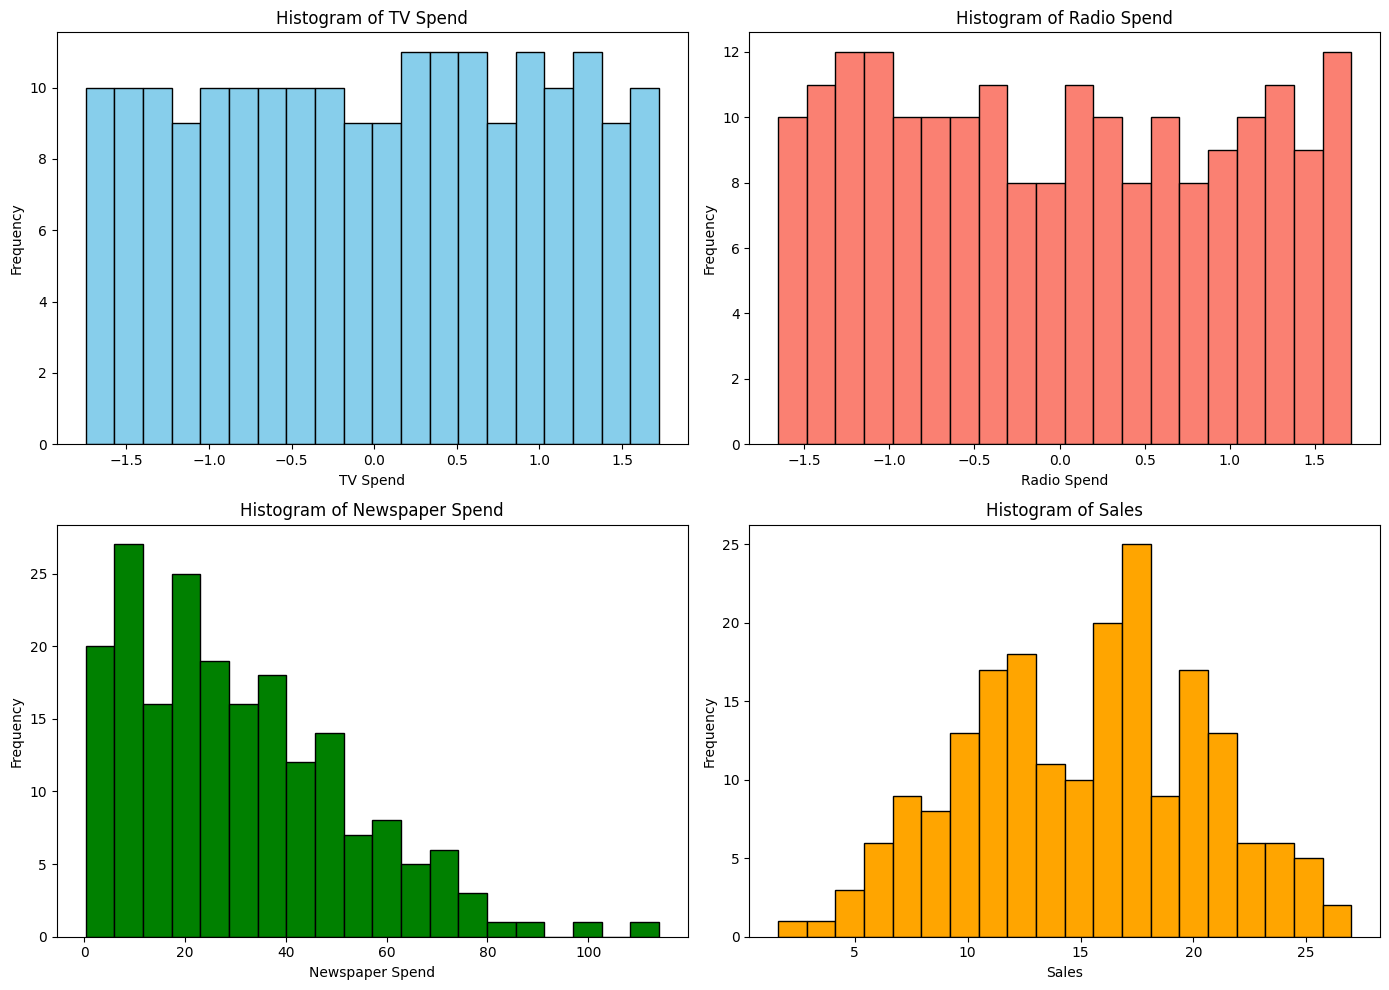

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for each feature
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# TV
axs[0, 0].hist(sales_df['TV'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of TV Spend')
axs[0, 0].set_xlabel('TV Spend')
axs[0, 0].set_ylabel('Frequency')

# Radio
axs[0, 1].hist(sales_df['Radio'], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('Histogram of Radio Spend')
axs[0, 1].set_xlabel('Radio Spend')
axs[0, 1].set_ylabel('Frequency')

# Newspaper
axs[1, 0].hist(sales_df['Newspaper'], bins=20, color='green', edgecolor='black')
axs[1, 0].set_title('Histogram of Newspaper Spend')
axs[1, 0].set_xlabel('Newspaper Spend')
axs[1, 0].set_ylabel('Frequency')

# Sales
axs[1, 1].hist(sales_df['Sales'], bins=20, color='orange', edgecolor='black')
axs[1, 1].set_title('Histogram of Sales')
axs[1, 1].set_xlabel('Sales')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Heatmap**

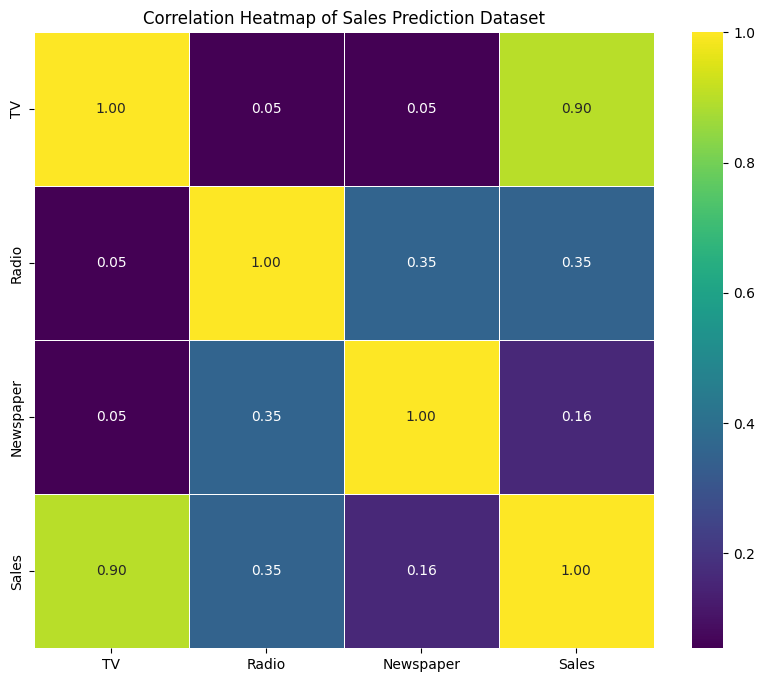

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = sales_df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sales Prediction Dataset')
plt.show()


**Pie chart**

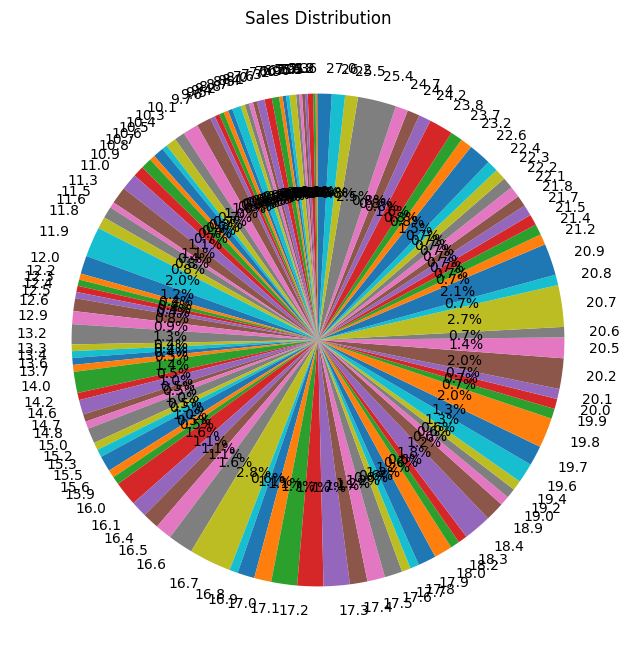

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'sales_df' is your DataFrame and you want to create a pie chart based on 'Sales' column

# Group the data and calculate the sum of sales for each category (if 'Sales' is not already categorical)
sales_by_category = sales_df.groupby('Sales')['Sales'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution')
plt.show()


**Box Plot**

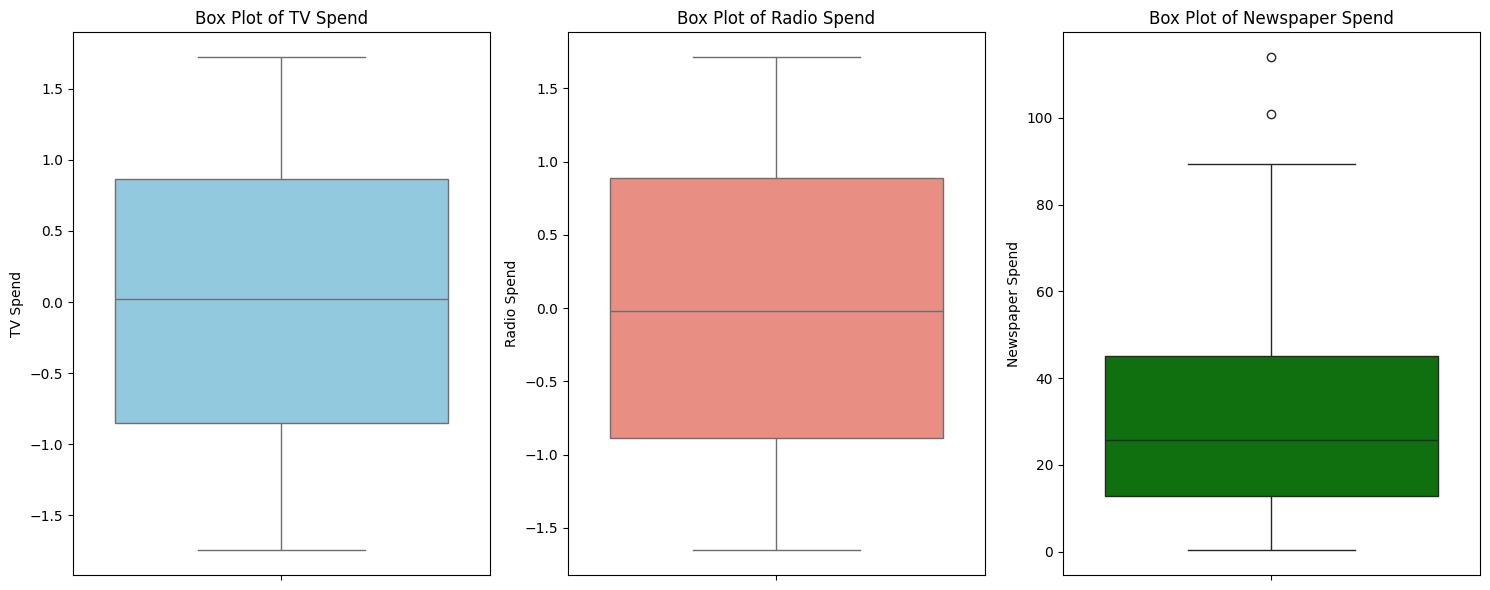

In [ ]:

import matplotlib.pyplot as plt
# Create box plots for each feature
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# TV
sns.boxplot(y=sales_df['TV'], ax=axs[0], color='skyblue')
axs[0].set_title('Box Plot of TV Spend')
axs[0].set_ylabel('TV Spend')

# Radio
sns.boxplot(y=sales_df['Radio'], ax=axs[1], color='salmon')
axs[1].set_title('Box Plot of Radio Spend')
axs[1].set_ylabel('Radio Spend')

# Newspaper
sns.boxplot(y=sales_df['Newspaper'], ax=axs[2], color='green')
axs[2].set_title('Box Plot of Newspaper Spend')
axs[2].set_ylabel('Newspaper Spend')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
